Лабораторная работа №2

In [139]:
import time
import numpy as np
import matplotlib.pyplot as plt

Задание №1

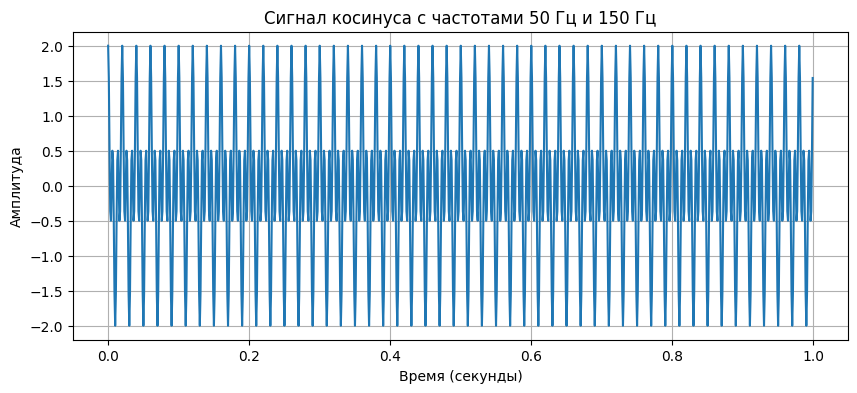

In [140]:
# Параметры сигнала
f1 = 50  
f2 = 150  
duration = 1.0
sampling_rate = 1000


# Создание временного массива
t = np.arange(0, 1, 1/sampling_rate )

# Генерация сигнала косинуса
signal = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Построение графика сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title('Сигнал косинуса с частотами 50 Гц и 150 Гц')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()


(А)

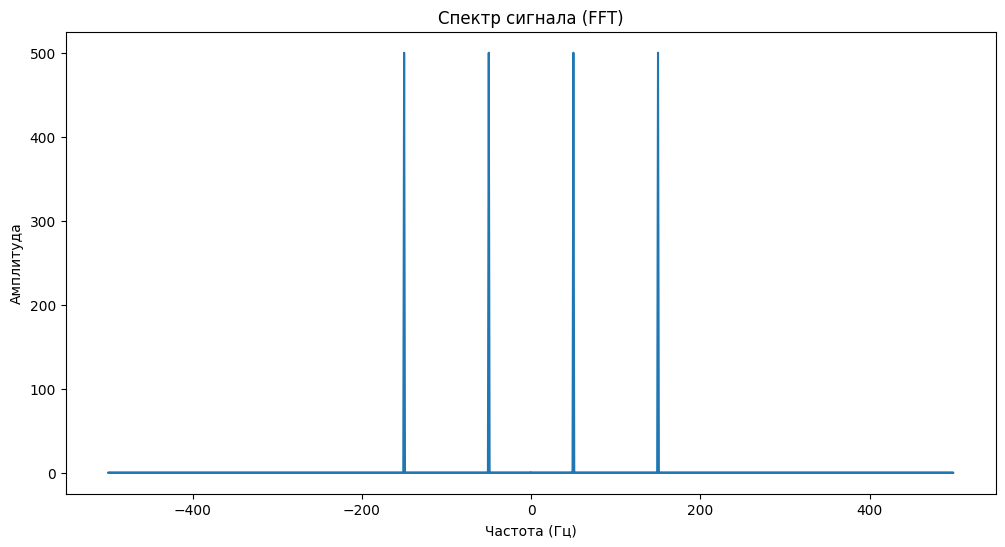

Время выполнения NumPy fft: 0.0006804466247558594 секунд


In [141]:
start_time = time.time()
fft_result = np.fft.fft(signal)
fft_time = time.time() - start_time

frequencies = np.fft.fftfreq(len(signal), 1/1000)

plt.figure(figsize=(12, 6))

plt.plot(frequencies, np.abs(fft_result))
plt.title('Спектр сигнала (FFT)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.show()
print(f"Время выполнения NumPy fft: {fft_time} секунд")


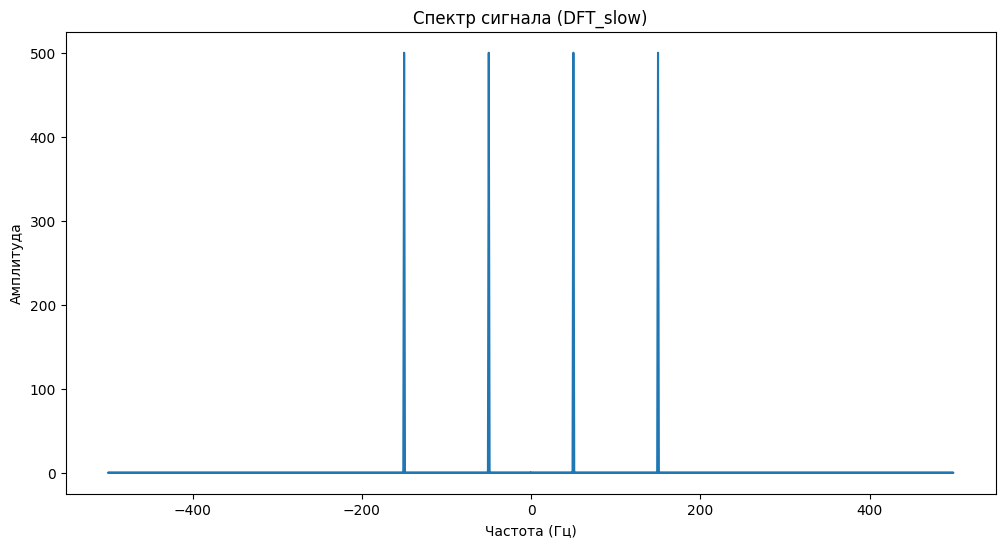

Время выполнения DFT_slow: 0.06763696670532227 секунд


In [142]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

start_time = time.time()
dft_result = DFT_slow(signal)
dft_time = time.time() - start_time

plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(dft_result))
plt.title('Спектр сигнала (DFT_slow)')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.show()
print(f"Время выполнения DFT_slow: {dft_time} секунд")


(Б)

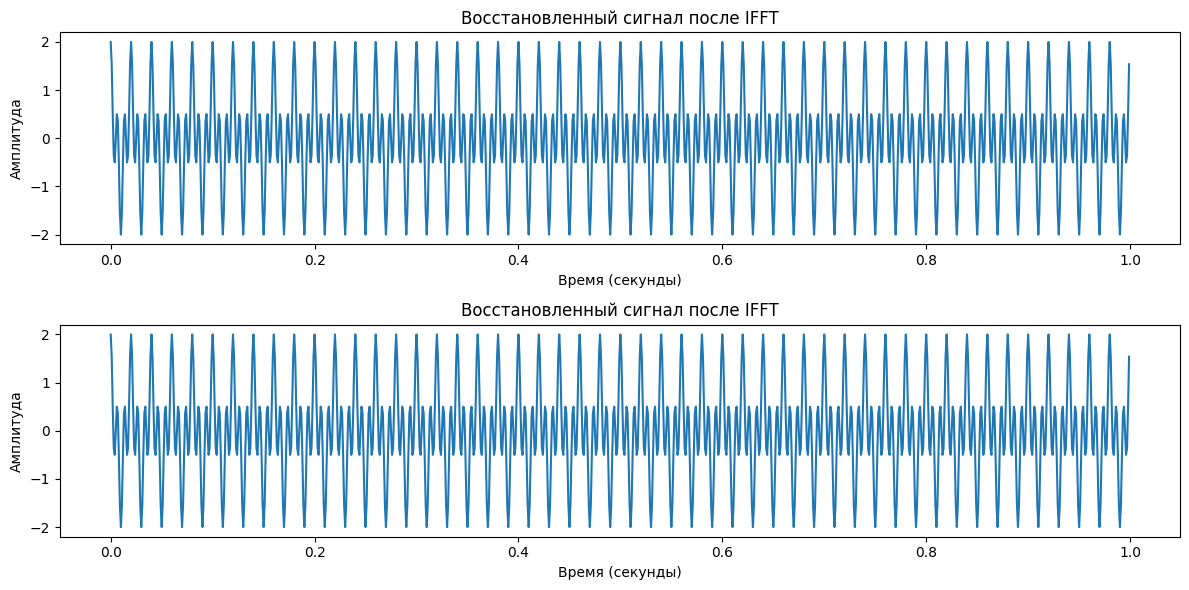

In [143]:
back_signal_fft = np.fft.ifft(fft_result)
back_signal_dft = np.fft.ifft(dft_result)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, back_signal_fft)
plt.title('Восстановленный сигнал после IFFT')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(t, back_signal_dft)
plt.title('Восстановленный сигнал после IFFT')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

(В)

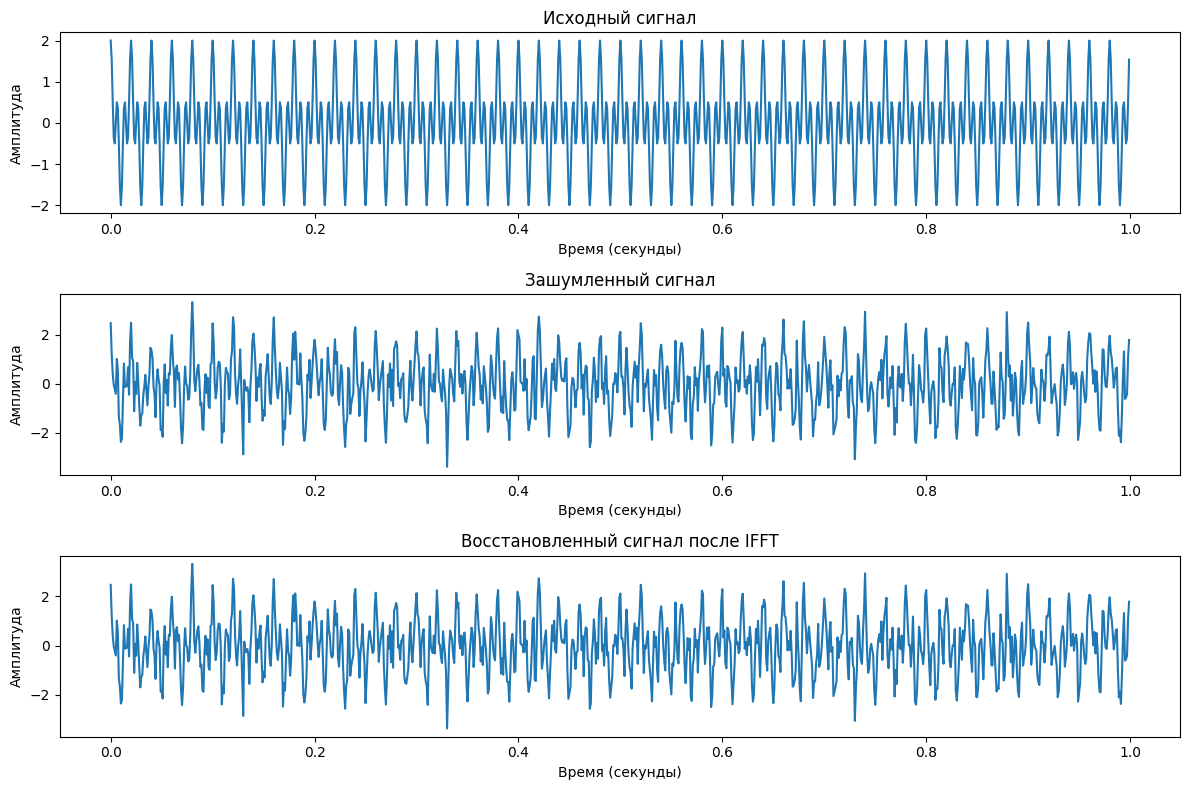

In [144]:
white_noise = np.random.normal(0,0.5,len(t))

noise_signal = signal + white_noise

dft_noise_signal = DFT_slow(noise_signal)

rest_signal = np.fft.ifft(dft_noise_signal)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Исходный сигнал')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.subplot(3, 1, 2)
plt.plot(t, noise_signal)
plt.title('Зашумленный сигнал')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.subplot(3, 1, 3)
plt.plot(t, rest_signal)
plt.title('Восстановленный сигнал после IFFT')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

Задание №2

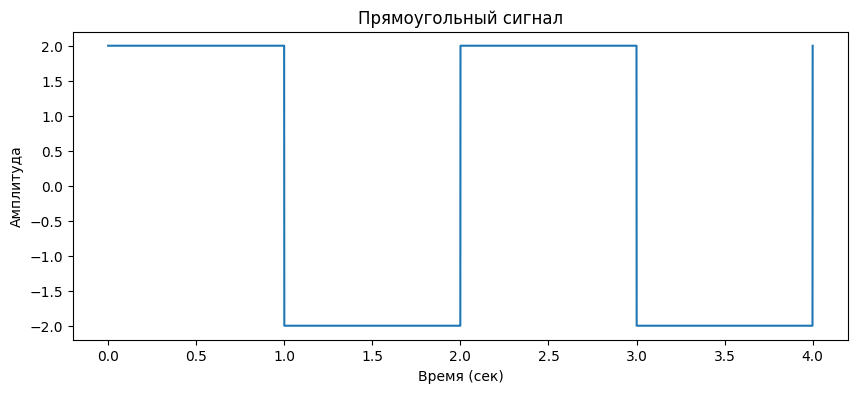

In [145]:
import numpy as np
import matplotlib.pyplot as plt

def create_rectangular_signal(amplitude, period, start_time, end_time, sampling_rate):
    time = np.linspace(start_time, end_time, int((end_time - start_time) * sampling_rate))
    signal = np.zeros_like(time)
    for i, t in enumerate(time):
        if (t - start_time) % period <= period / 2:
            signal[i] = amplitude
        else:
            signal[i] = -amplitude
    return time, signal

# Параметры сигнала
amplitude = 2
period = 2
start_time = 0
end_time = 4
sampling_rate = 1000  # Частота дискретизации

# Создание сигнала
tim, signal = create_rectangular_signal(amplitude, period, start_time, end_time, sampling_rate)

# Вывод сигнала
plt.figure(figsize=(10, 4))
plt.plot(tim, signal)
plt.title("Прямоугольный сигнал")
plt.xlabel("Время (сек)")
plt.ylabel("Амплитуда")
plt.show()


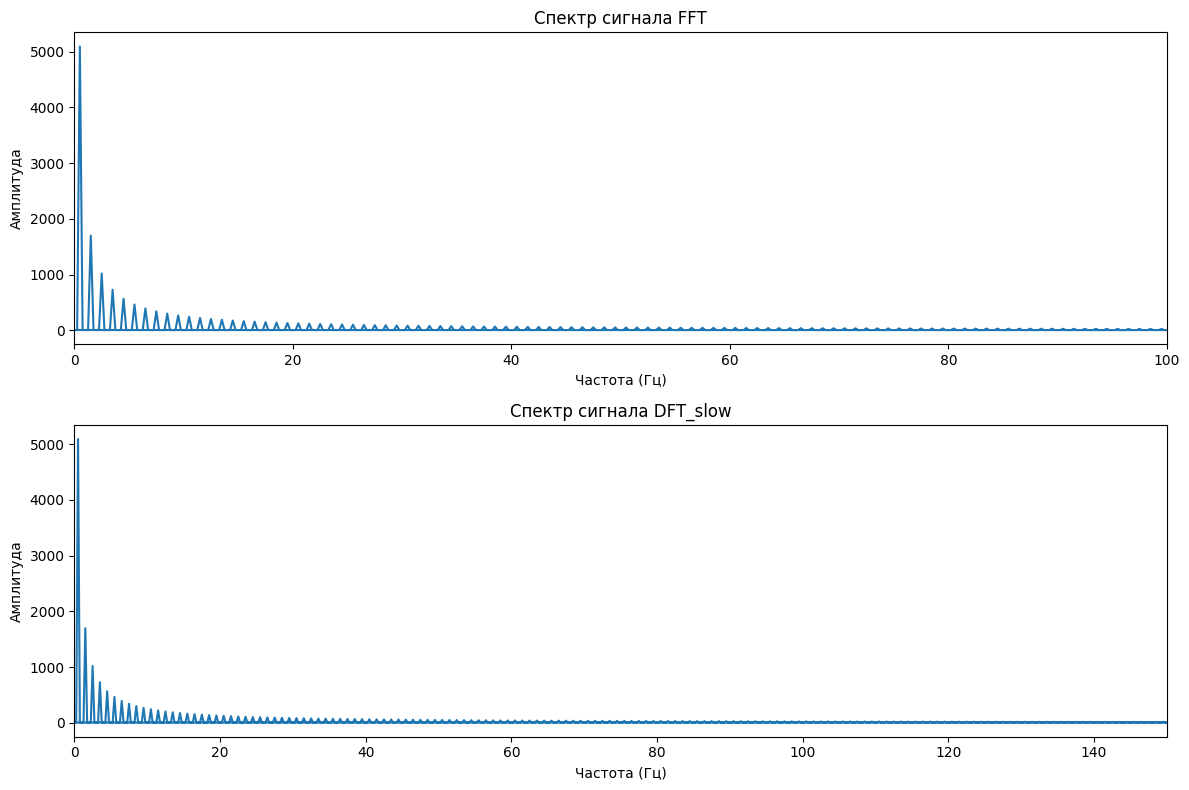

In [146]:
fft_result = np.fft.fft(signal)
dft_result = DFT_slow(signal)
freq = np.fft.fftfreq(len(signal), 1/1000)


plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(freq, np.abs(fft_result))
plt.title('Спектр сигнала FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, 100)
plt.subplot(2, 1, 2)
plt.plot(freq, abs(dft_result))
plt.title('Спектр сигнала DFT_slow')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0, 150)

plt.tight_layout()
plt.show()

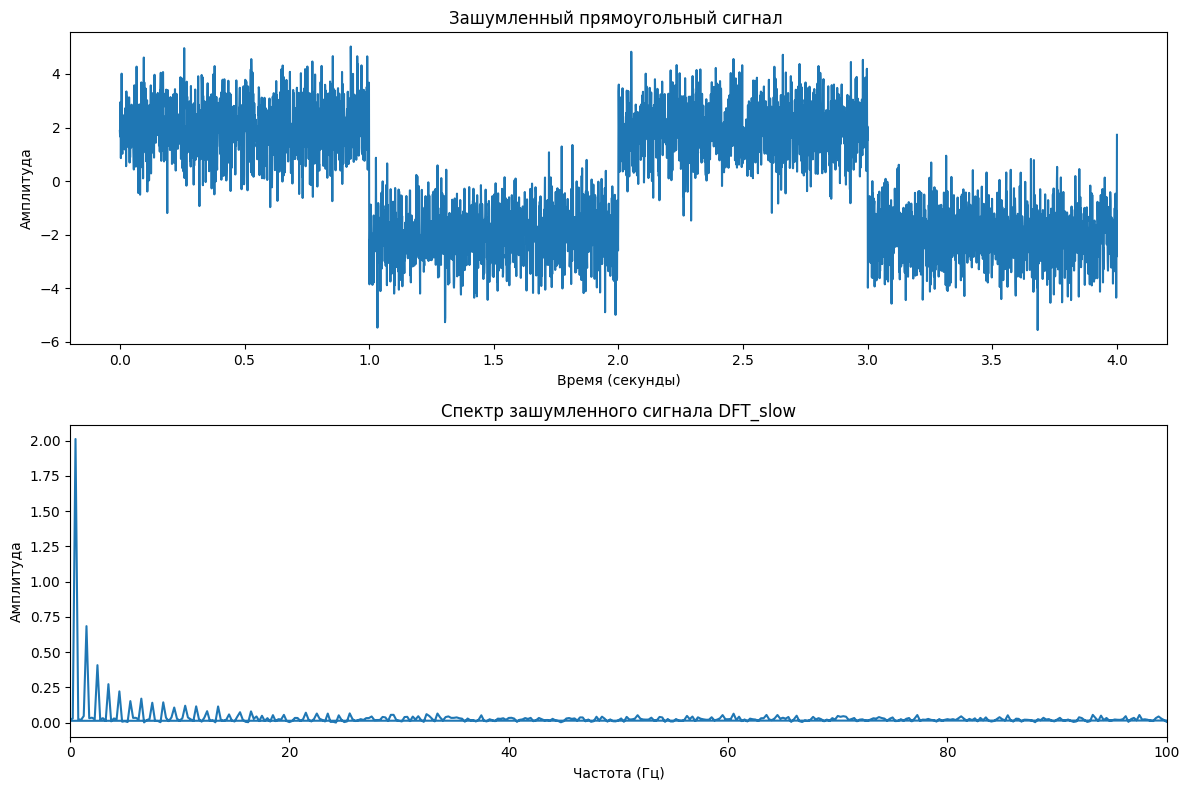

In [147]:
white_noise = np.random.normal(0,1.0,len(tim))
noise_rectangular_signal = white_noise + signal
dft_noise_rectangular_signal = DFT_slow(noise_rectangular_signal)

freq = np.fft.fftfreq(len(noise_rectangular_signal), 1/1000)
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(tim, noise_rectangular_signal)
plt.title('Зашумленный прямоугольный сигнал ')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.subplot(2, 1, 2)
plt.plot(freq, abs(dft_noise_rectangular_signal)/2500)
plt.title('Спектр зашумленного сигнала DFT_slow')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.xlim(0,100)
plt.tight_layout()
plt.show()

Задание №3

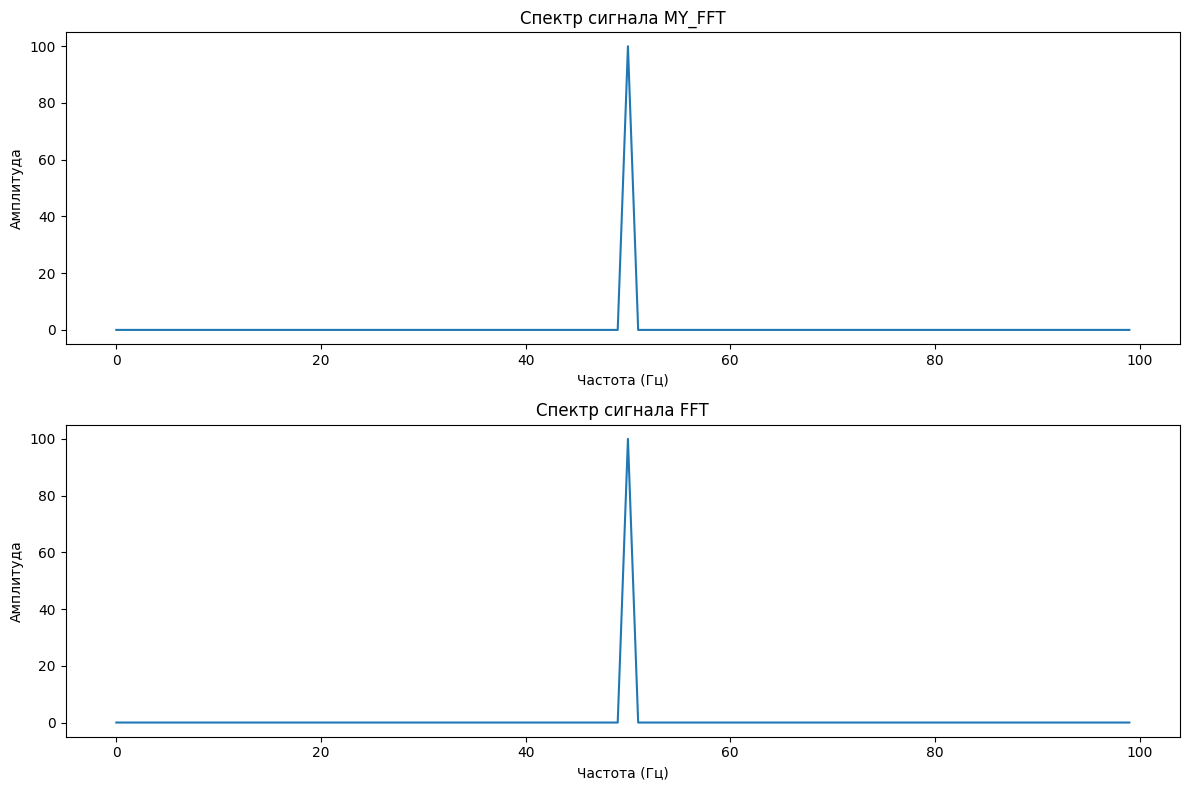

Время выполнения my_fft:  0.0014841556549072266
Время выполнения fft:  0.00012159347534179688


In [148]:
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:N // 2] * X_odd,
                               X_even + factor[N //2:] * X_odd])
    

    
duration = 1.0  # Длительность сигнала в секундах
sampling_frequency = 1000  # Частота дискретизации в Гц
frequency = 50.0  # Частота сигнала в Гц
t = np.arange(0, 1, 1/100 )
signal = np.cos(2 * np.pi * frequency * t)

# print(np.size(signal))

start_time = time.time()
my_fft = FFT(signal)
my_fft_time = time.time() - start_time

start_time = time.time()
fft_result = np.fft.fft(signal)
fft_time = time.time() - start_time

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(my_fft)
plt.title('Спектр сигнала MY_FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.subplot(2, 1, 2)
plt.plot(fft_result)
plt.title('Спектр сигнала FFT')
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.tight_layout()
plt.show()
print("Время выполнения my_fft: ", my_fft_time)
print("Время выполнения fft: ", fft_time)
